# ANÁLISE DE DADOS ENEM 2019 DO ESTADO DE SP

Análise baseada no curso de Estatística para Análise de Dados com Python, ministrada pelo prof. Luciano Galdino, pela plataforma Udemy.

Dados extraídos do site do INEP:

http://inep.gov.br/microdados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:/Programação/Estatistica_Python_Udemy/DATASET/microdados_enem_2019_sp.csv', sep=';', encoding='iso=8859-1')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q025
0,"1,90E+11",3546801,Santa Isabel,35,SP,22,M,1,3,1,1506500.0,Santa Izabel do Pará,15.0,PA,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,5646.0,5858.0,5929.0,6002.0,0,1.0,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",3538204,Pinhalzinho,35,SP,19,M,1,3,1,1503804.0,Jacundá,15.0,PA,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,"1,90E+11",3550308,São Paulo,35,SP,17,F,1,3,1,1501402.0,Belém,15.0,PA,2,0,3,1.0,0,15567761.0,1501402.0,Belém,15.0,PA,4.0,1.0,1.0,1,1,1,1,5762.0,6411.0,6343.0,7318.0,0,1.0,160.0,120.0,200.0,200.0,200.0,880.0,A
3,"1,90E+11",3548708,São Bernardo do Campo,35,SP,19,M,1,3,1,3548708.0,São Bernardo do Campo,35.0,SP,2,0,2,1.0,0,35904958.0,3548708.0,São Bernardo do Campo,35.0,SP,2.0,1.0,1.0,1,1,1,1,4022.0,4248.0,5096.0,3932.0,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0,B
4,"1,90E+11",3549409,São Joaquim da Barra,35,SP,37,M,2,1,1,3549409.0,São Joaquim da Barra,35.0,SP,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813772 entries, 0 to 813771
Data columns (total 44 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   NU_INSCRICAO             813772 non-null  object 
 1   CO_MUNICIPIO_RESIDENCIA  813772 non-null  int64  
 2   NO_MUNICIPIO_RESIDENCIA  813772 non-null  object 
 3   CO_UF_RESIDENCIA         813772 non-null  int64  
 4   SG_UF_RESIDENCIA         813772 non-null  object 
 5   NU_IDADE                 813772 non-null  int64  
 6   TP_SEXO                  813772 non-null  object 
 7   TP_ESTADO_CIVIL          813772 non-null  int64  
 8   TP_COR_RACA              813772 non-null  int64  
 9   TP_NACIONALIDADE         813772 non-null  int64  
 10  CO_MUNICIPIO_NASCIMENTO  794063 non-null  float64
 11  NO_MUNICIPIO_NASCIMENTO  794063 non-null  object 
 12  CO_UF_NASCIMENTO         794063 non-null  float64
 13  SG_UF_NASCIMENTO         794063 non-null  object 
 14  TP_S

# FASE DE TRATAMENTO DOS DADOS

In [6]:
# excluindo colunas que não serão utilizadas nesta analise
df = df.drop(columns=['CO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA', 'CO_UF_RESIDENCIA', 'TP_ESTADO_CIVIL', 
                      'CO_MUNICIPIO_NASCIMENTO', 'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO', 
                      'CO_MUNICIPIO_ESC', 'CO_UF_ESC', 'TP_ANO_CONCLUIU','TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
                      'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'Q025'])

In [7]:
# renomeando algumas colunas para facilitar a manipulação
df = df.rename(columns={'NU_IDADE': 'IDADE','TP_SEXO': 'SEXO', 'TP_COR_RACA': 'RACA', 'TP_ESCOLA':'ESCOLA',
                        'NU_NOTA_CN': 'NOTA_CN', 'NU_NOTA_CH': 'NOTA_CH', 'NU_NOTA_LC': 'NOTA_LC', 'NU_NOTA_MT': 'NOTA_MT',
                       'NU_NOTA_COMP1': 'NOTA_COMP1', 'NU_NOTA_COMP2': 'NOTA_COMP2', 'NU_NOTA_COMP3': 'NOTA_COMP3', 
                       'NU_NOTA_COMP4': 'NOTA_COMP4', 'NU_NOTA_COMP5': 'NOTA_COMP5', 'NU_NOTA_REDACAO': 'NOTA_REDACAO'})

In [8]:
# renomeando índices de acordo com o dicionário da tabela
df['RACA'] = df['RACA'].replace({0:"nao_declarado", 1:"branca", 2:"preta", 3:"parda", 4:"amarela", 5:"indigena"})

In [9]:
df['TP_LINGUA'] = df ['TP_LINGUA'].replace({0:"Inglês", 1:"Espanhol"})

In [10]:
df['ESCOLA'] = df['ESCOLA'].replace({1:"não_respondeu", 2:"pública", 3:"privada", 4:"exterior"})

In [11]:
# corrigindo os valores das notas
df.loc[:, 'NOTA_CN'] /= 10
df.loc[:, 'NOTA_CH'] /= 10
df.loc[:, 'NOTA_LC'] /= 10
df.loc[:, 'NOTA_MT'] /= 10

In [12]:
#separando os candidatos treineiros que não serão objeto da análise
df.query('IN_TREINEIRO == 1')['IN_TREINEIRO'].value_counts()

1    93991
Name: IN_TREINEIRO, dtype: int64

In [13]:
df_treineiros = df.loc[df.IN_TREINEIRO == 1]

In [14]:
# novo dataframe apenas com os vestibulandos
df_vestibulandos = df.loc[df.IN_TREINEIRO == 0]

In [15]:
df_vestibulandos.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO
0,"1,90E+11",Santa Isabel,22,M,parda,1,1,não_respondeu,0,NaN,NaN,NaN,1,1,1,1,564.6,585.8,592.9,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0
1,"1,90E+11",Pinhalzinho,19,M,parda,1,1,não_respondeu,0,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,Espanhol,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1,90E+11",São Paulo,17,F,parda,1,2,privada,0,15567761.0,Belém,PA,1,1,1,1,576.2,641.1,634.3,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0
3,"1,90E+11",São Bernardo do Campo,19,M,parda,1,2,pública,0,35904958.0,São Bernardo do Campo,SP,1,1,1,1,402.2,424.8,509.6,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0
4,"1,90E+11",São Joaquim da Barra,37,M,branca,1,1,não_respondeu,0,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,Espanhol,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# verificando se existem erros nas idades dos candidatos
df ['IDADE'].value_counts().sort_index()

2          1
3          1
4          1
5          2
6          2
7          3
8          6
12         6
13        29
14       355
15     11583
16     59316
17    219313
18    147548
19     81236
20     53009
21     37242
22     29489
23     23531
24     18851
25     15103
26     12465
27     10367
28      8986
29      7650
30      6967
31      6331
32      5685
33      5175
34      4795
35      4340
36      4109
37      4105
38      3767
39      3299
40      3058
41      2638
42      2462
43      2307
44      2069
45      1939
46      1718
47      1578
48      1496
49      1304
50      1167
51      1014
52       933
53       841
54       727
55       652
56       530
57       497
58       388
59       325
60       254
61       236
62       176
63       144
64       139
65       115
66        81
67        72
68        53
69        43
70        40
71        25
72        17
73        16
74        13
75        10
76         8
77         3
78         3
79         4
80         2
81         3

In [17]:
# novo dataframe apenas com idades válidas para ingressar nas universidades
df_validos = df_vestibulandos.loc[df_vestibulandos.IDADE > 16]

In [18]:
df_validos['IDADE'].value_counts().sort_index()

17    197330
18    145707
19     80953
20     52924
21     37201
22     29441
23     23493
24     18827
25     15078
26     12444
27     10340
28      8975
29      7636
30      6949
31      6321
32      5675
33      5167
34      4783
35      4325
36      4100
37      4098
38      3757
39      3291
40      3041
41      2632
42      2452
43      2298
44      2061
45      1931
46      1709
47      1570
48      1488
49      1303
50      1157
51      1009
52       929
53       839
54       722
55       644
56       527
57       495
58       387
59       324
60       253
61       235
62       175
63       144
64       139
65       115
66        78
67        72
68        53
69        42
70        40
71        25
72        17
73        16
74        13
75        10
76         8
77         3
78         3
79         4
80         2
81         3
82         2
86         1
91         1
Name: IDADE, dtype: int64

In [19]:
# contando a presença nas provas
# 0: faltou, 1: presente, 2: eliminado
df_validos['TP_PRESENCA_CN'].value_counts()

1    499163
0    218354
2       270
Name: TP_PRESENCA_CN, dtype: int64

In [20]:
df_validos['TP_PRESENCA_MT'].value_counts()

1    499163
0    218354
2       270
Name: TP_PRESENCA_MT, dtype: int64

In [21]:
df_validos['TP_PRESENCA_CH'].value_counts()

1    531402
0    185734
2       651
Name: TP_PRESENCA_CH, dtype: int64

In [22]:
df_validos['TP_PRESENCA_LC'].value_counts()

1    531402
0    185734
2       651
Name: TP_PRESENCA_LC, dtype: int64

In [23]:
# selecionando apenas os que estavam presentes nos dois dias de provas
df_validos = df_validos.loc[df_validos.TP_PRESENCA_CH == 1]

In [24]:
df_validos = df_validos.loc[df_validos.TP_PRESENCA_MT == 1]

In [25]:
df_validos['TP_PRESENCA_LC'].value_counts()

1    498311
Name: TP_PRESENCA_LC, dtype: int64

In [26]:
df_validos['TP_PRESENCA_CN'].value_counts()

1    498311
Name: TP_PRESENCA_CN, dtype: int64

In [27]:
# verificando valores missing nas notas das provas
provas = ['NOTA_REDACAO','NOTA_CN','NOTA_MT','NOTA_LC','NOTA_CH']
df_validos[provas].isnull().sum()

NOTA_REDACAO    0
NOTA_CN         0
NOTA_MT         0
NOTA_LC         0
NOTA_CH         0
dtype: int64

In [28]:
# criando uma coluna com as médias simples de todas as notas
df_validos['MEDIA_TOTAL'] = df_validos[provas].sum(axis=1) / 5

In [29]:
df_validos.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,IN_TREINEIRO,CO_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,MEDIA_TOTAL
0,"1,90E+11",Santa Isabel,22,M,parda,1,1,não_respondeu,0,NaN,NaN,NaN,1,1,1,1,564.6,585.8,592.9,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,656.70
2,"1,90E+11",São Paulo,17,F,parda,1,2,privada,0,15567761.0,Belém,PA,1,1,1,1,576.2,641.1,634.3,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,692.68
3,"1,90E+11",São Bernardo do Campo,19,M,parda,1,2,pública,0,35904958.0,São Bernardo do Campo,SP,1,1,1,1,402.2,424.8,509.6,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,457.96
5,"1,90E+11",Embu-Guaçu,17,F,parda,1,2,pública,0,NaN,NaN,NaN,1,1,1,1,399.6,426.8,487.2,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,458.56
8,"1,90E+11",Guarulhos,23,F,branca,1,1,não_respondeu,0,NaN,NaN,NaN,1,1,1,1,625.7,646.5,629.3,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,715.52


# FASE DE ANÁLISE DOS DADOS

### Contando as notas 0 em cada matéria

In [30]:
df_validos.query('NOTA_REDACAO == 0')['NOTA_REDACAO'].value_counts()

0.0    9152
Name: NOTA_REDACAO, dtype: int64

In [31]:
df_validos.query('NOTA_COMP1 == 0')['NOTA_COMP1'].value_counts()

0.0    9159
Name: NOTA_COMP1, dtype: int64

In [32]:
df_validos.query('NOTA_COMP2 == 0')['NOTA_COMP2'].value_counts()

0.0    9152
Name: NOTA_COMP2, dtype: int64

In [33]:
df_validos.query('NOTA_COMP3 == 0')['NOTA_COMP3'].value_counts()

0.0    9168
Name: NOTA_COMP3, dtype: int64

In [34]:
df_validos.query('NOTA_COMP4 == 0')['NOTA_COMP4'].value_counts()

0.0    9165
Name: NOTA_COMP4, dtype: int64

In [35]:
df_validos.query('NOTA_COMP5 == 0')['NOTA_COMP5'].value_counts()

0.0    73126
Name: NOTA_COMP5, dtype: int64

NOTAS ZEROS EM REDAÇÃO:

REDAÇÃO (final): 9152 notas zeros devido a não cumprimento das regras ou tirou zero em todos os cinco componentes.

COMPONENTE 1(Demonstrar domínio da modalidade escrita formal da Língua Portuguesa.): 9159.

COMPONENTE 2 (Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa): 9152.

COMPONENTE 3 (Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista): 9168.

COMPONENTE 4 (Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.): 9165.

COMPONENTE 5 (Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos): 73126.

Nota-se que a maior dificuldade entre os candidatos é a elaboração da proposta de intervenção do problema abordado, respeitando os direitos humanos.

In [36]:
df_validos.query('NOTA_CH == 0')['NOTA_CH'].value_counts()

0.0    342
Name: NOTA_CH, dtype: int64

In [37]:
df_validos.query('NOTA_CN == 0')['NOTA_CN'].value_counts()

0.0    34
Name: NOTA_CN, dtype: int64

In [38]:
df_validos.query('NOTA_LC == 0')['NOTA_LC'].value_counts()

0.0    135
Name: NOTA_LC, dtype: int64

In [39]:
df_validos.query('NOTA_MT == 0')['NOTA_MT'].value_counts()

0.0    54
Name: NOTA_MT, dtype: int64

NOTAS ZEROS DOS INSCRITOS CONCORRENTES AO VESTIBULAR:

Ciências Humanas = 342

Ciências da Natureza = 34

Linguagens e Códigos = 135

Matemática = 54

Nota-se uma maior deficiência entre os candidatos nas matérias de ciências humanas e linguagens e códigos.

### Verificando a média das notas

In [40]:
df_validos['MEDIA_TOTAL'].describe()

count    498311.000000
mean        502.882000
std          97.313362
min           0.000000
25%         437.500000
50%         500.740000
75%         567.200000
max         835.900000
Name: MEDIA_TOTAL, dtype: float64

A média da Média Total dos vestibulandos foi de 502.88, com nota máxima de 835.9 e mínima de 0

In [41]:
df_validos['NOTA_REDACAO'].describe()

count    498311.000000
mean        592.920646
std         170.520272
min           0.000000
25%         500.000000
50%         600.000000
75%         680.000000
max        1000.000000
Name: NOTA_REDACAO, dtype: float64

A média das notas de redação foi de 592.92, com nota máxima de 1000 e mínima de 0

In [42]:
df_validos['NOTA_CH'].describe()

count    498311.000000
mean        482.208679
std         161.127245
min           0.000000
25%         450.500000
50%         523.700000
75%         578.100000
max         822.700000
Name: NOTA_CH, dtype: float64

A média das notas de ciências humanas foi de 482.20, com nota máxima de 822.70 e mínima de 0

In [43]:
df_validos['NOTA_CN'].describe()

count    498311.000000
mean        449.881091
std         152.973131
min           0.000000
25%         412.400000
50%         477.900000
75%         544.400000
max         860.900000
Name: NOTA_CN, dtype: float64

A média das notas de ciências naturais foi de 449.88, com nota máxima de 860.9 e minima de 0

In [44]:
df_validos['NOTA_LC'].describe()

count    498311.000000
mean        491.923662
std         156.245503
min           0.000000
25%         490.100000
50%         538.300000
75%         576.200000
max         772.300000
Name: NOTA_LC, dtype: float64

A média das notas de linguagens e códigos foi de 491.92, com nota máxima de 772.30 e mínima de 0

In [45]:
df_validos['NOTA_MT'].describe()

count    498311.000000
mean        497.475921
std         183.450639
min           0.000000
25%         427.800000
50%         511.700000
75%         617.800000
max         984.700000
Name: NOTA_MT, dtype: float64

A médias das notas de matemática foi de 497.47, com nota máxima de 984.7 e mínima de 0

Portanto, a maior média foi da nota de redação (592.92), seguida por matemática (497.47), linguagens e códigos (491.92), ciências
humanas (482.20) e ciências naturais (449.88)

### Analisando as notas comparando por sexo, raça e tipo de escola

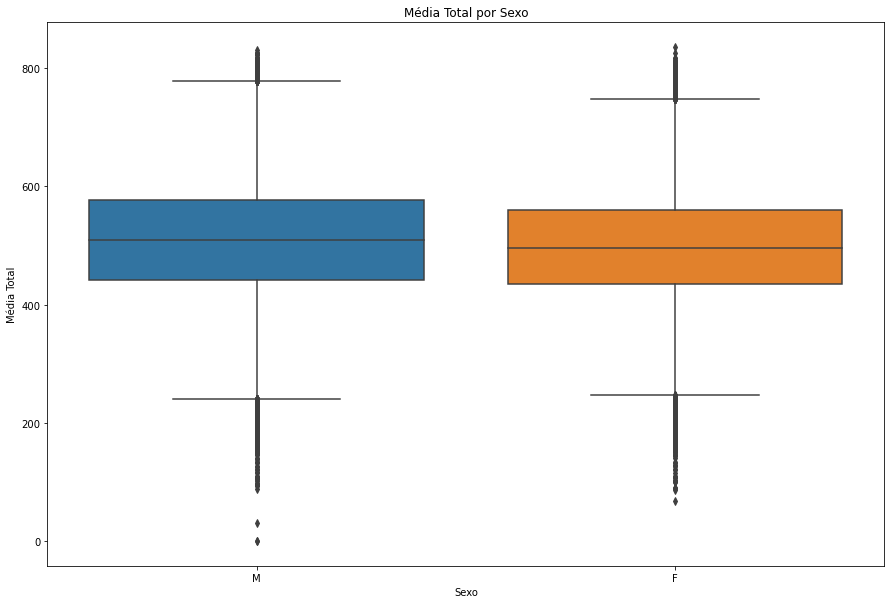

In [46]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df_validos, x='SEXO', y='MEDIA_TOTAL', ax=ax).set_title('Média Total por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Média Total')
fig.savefig('media_sexo.png')
plt.show()

Pelo gráfico acima, é possível observar que as notas máximas e mínimas dos candidatos do sexo feminino (835,9 e 68) foram maiores do que as notas dos candidatos do sexo masculino (830,42 e 0), porém a distribuição das notas dos candidatos do sexo masculino ficaram com uma média um pouco acima dos candidatos do sexo feminino. 

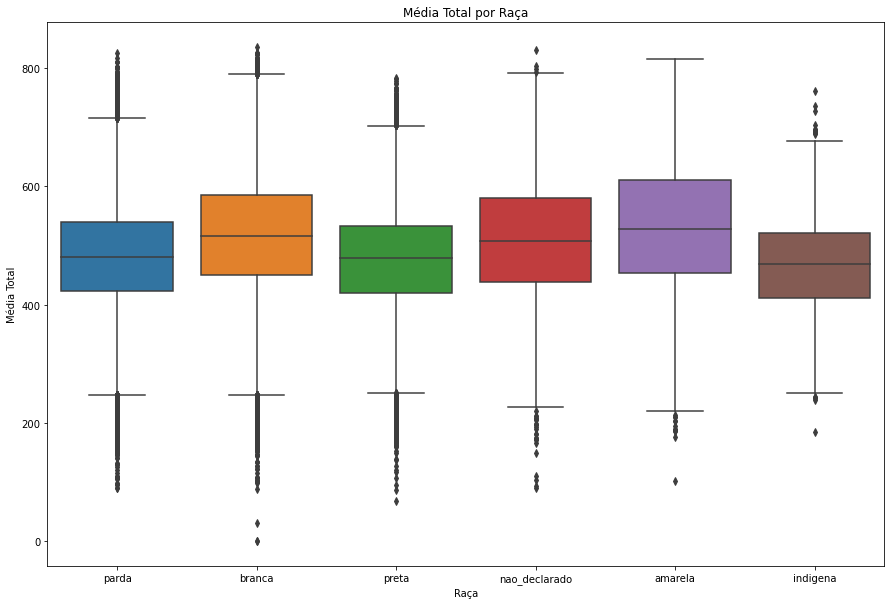

In [47]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df_validos, x='RACA', y='MEDIA_TOTAL', ax=ax).set_title('Média Total por Raça')
plt.xlabel('Raça')
plt.ylabel('Média Total')
fig.savefig('media_raca.png')
plt.show()

Pelo gráfico acima, é possível observar que a distribuição das notas com a melhor média é da raça amarela, seguida pela raça
branca, não declarados, parda, preta e indígena. A maior média total foi da raça branca (835,9).

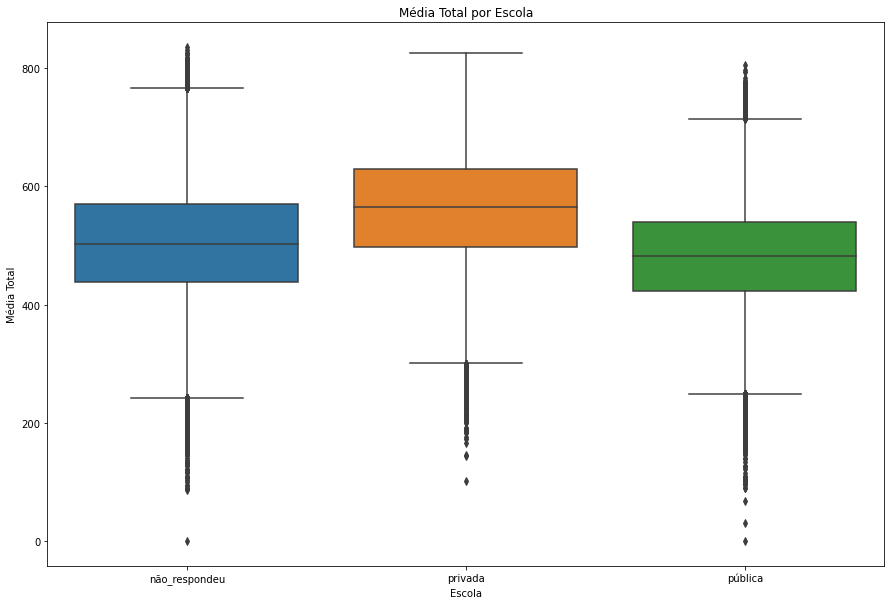

In [48]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df_validos, x='ESCOLA', y='MEDIA_TOTAL', ax=ax).set_title('Média Total por Escola')
plt.xlabel('Escola')
plt.ylabel('Média Total')
fig.savefig('media_escola.png')
plt.show()

Com o gráfico acima, podemos observar que os candidatos de escola privada obtiveram as melhores notas, o que demonstra uma
necessidade maior de investimentos na educação pública.